# ADA Milestone 2

Before we begin any vizualisation or analysis of data, we need to set up the environment by installing different libraries that will help us afterwards

## Useful libraries

In [16]:
import pandas as pd
import numpy as np
import ast
import missingno as msno
from geopy.geocoders import Nominatim
import geopandas as gpd
import re
import pycountry_convert as pc
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
# à compléter voire mettre des pip install directement ici

## Data importation

- Now that everything is set up, we can import the data. We already created a path on the Github, so we only need to import them

In [18]:
import dataframes as RAW
import cleaning as CLEAN

- We can now start to visualize all the data that we have and see what information they give us 

In [5]:
RAW.character_data.head()


,Wiki ID,Freebase ID,Release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at release,Map ID,Character ID,Actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [6]:
RAW.character_data.describe()

,Wiki ID,Actor height,Actor age at release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [7]:
RAW.movie_data.head()

,Wiki ID,Freebase ID,Movie name,Release date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ..."


In [8]:
RAW.movie_data.describe()

,Wiki ID,Release date,Revenue,Runtime
count,3.937200e+04,39372,6.793000e+03,32669.000000
mean,1.663258e+07,1978-01-24 00:35:35.202682112,5.673971e+07,95.248277
min,3.217000e+03,1892-10-28 00:00:00,1.000000e+04,0.100000
25%,5.872940e+06,1952-07-04 00:00:00,3.000000e+06,83.000000
50%,1.602267e+07,1989-01-24 00:00:00,1.486709e+07,95.000000
75%,2.625549e+07,2005-07-18 06:00:00,5.297001e+07,108.000000
max,3.747359e+07,2016-06-08 00:00:00,2.782275e+09,5700.000000
std,1.126984e+07,NaN,1.222691e+08,64.337785


In [9]:
RAW.character_names.head()

,Character name,Freebase ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [10]:
RAW.character_names.describe()

,Character name,Freebase ID
count,2666,2666
unique,970,2661
top,Daffy Duck,/m/0gcy23_
freq,42,2


In [11]:
RAW.tvtropes.head()

,Character type,Character name,Movie,Freebase ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [12]:
RAW.tvtropes.describe()

,Character type,Character name,Movie,Freebase ID,Actor name
count,501,501,501,501,501
unique,72,434,383,447,350
top,crazy_jealous_guy,Captain Jack Sparrow,Pirates of the Caribbean: Dead Man's Chest,/m/0k1xxm,Robert De Niro
freq,25,5,7,5,9


In [13]:
RAW.summaries.head()

,Wiki ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [14]:
RAW.summaries.describe()

,Wiki ID,Summary
count,42303,42303
unique,42303,42295
top,23890098,A woman is thrown out of her home by her jealo...
freq,1,5


## Data cleaning

<Axes: >

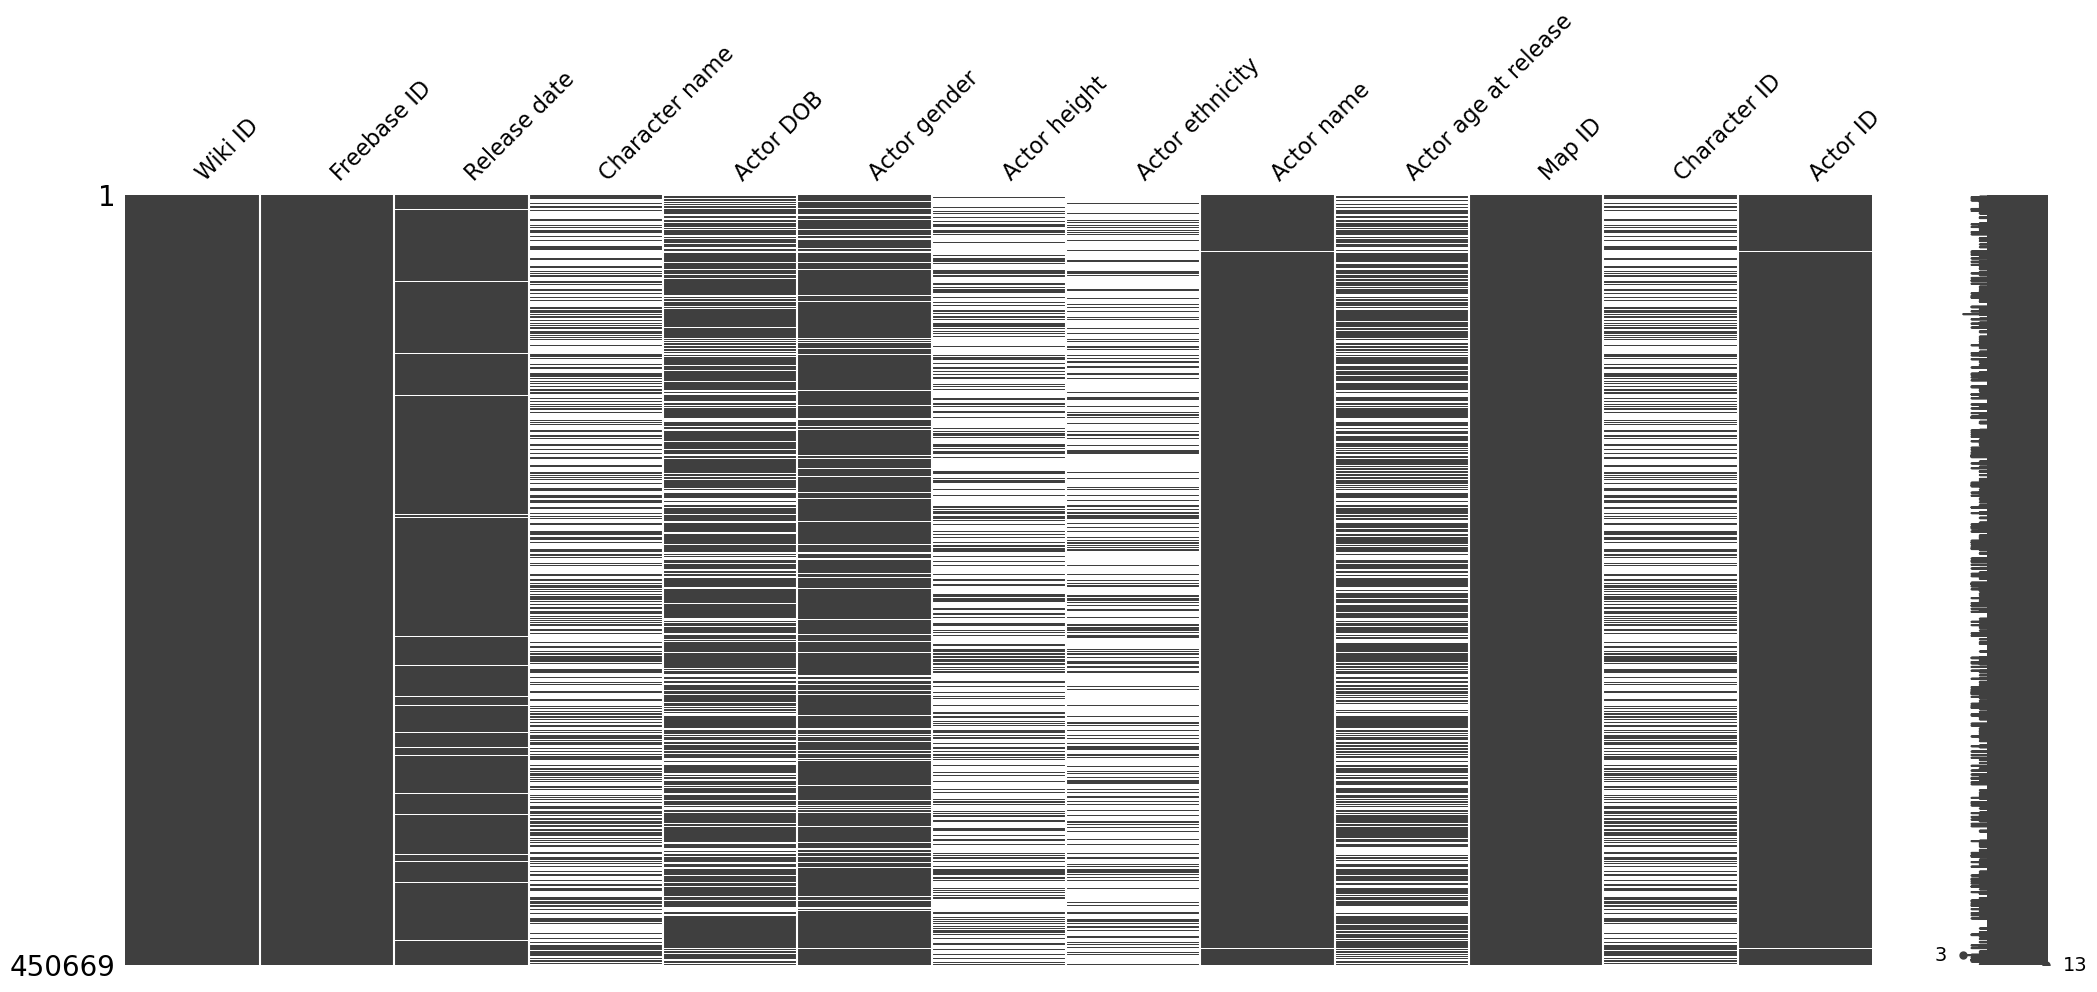

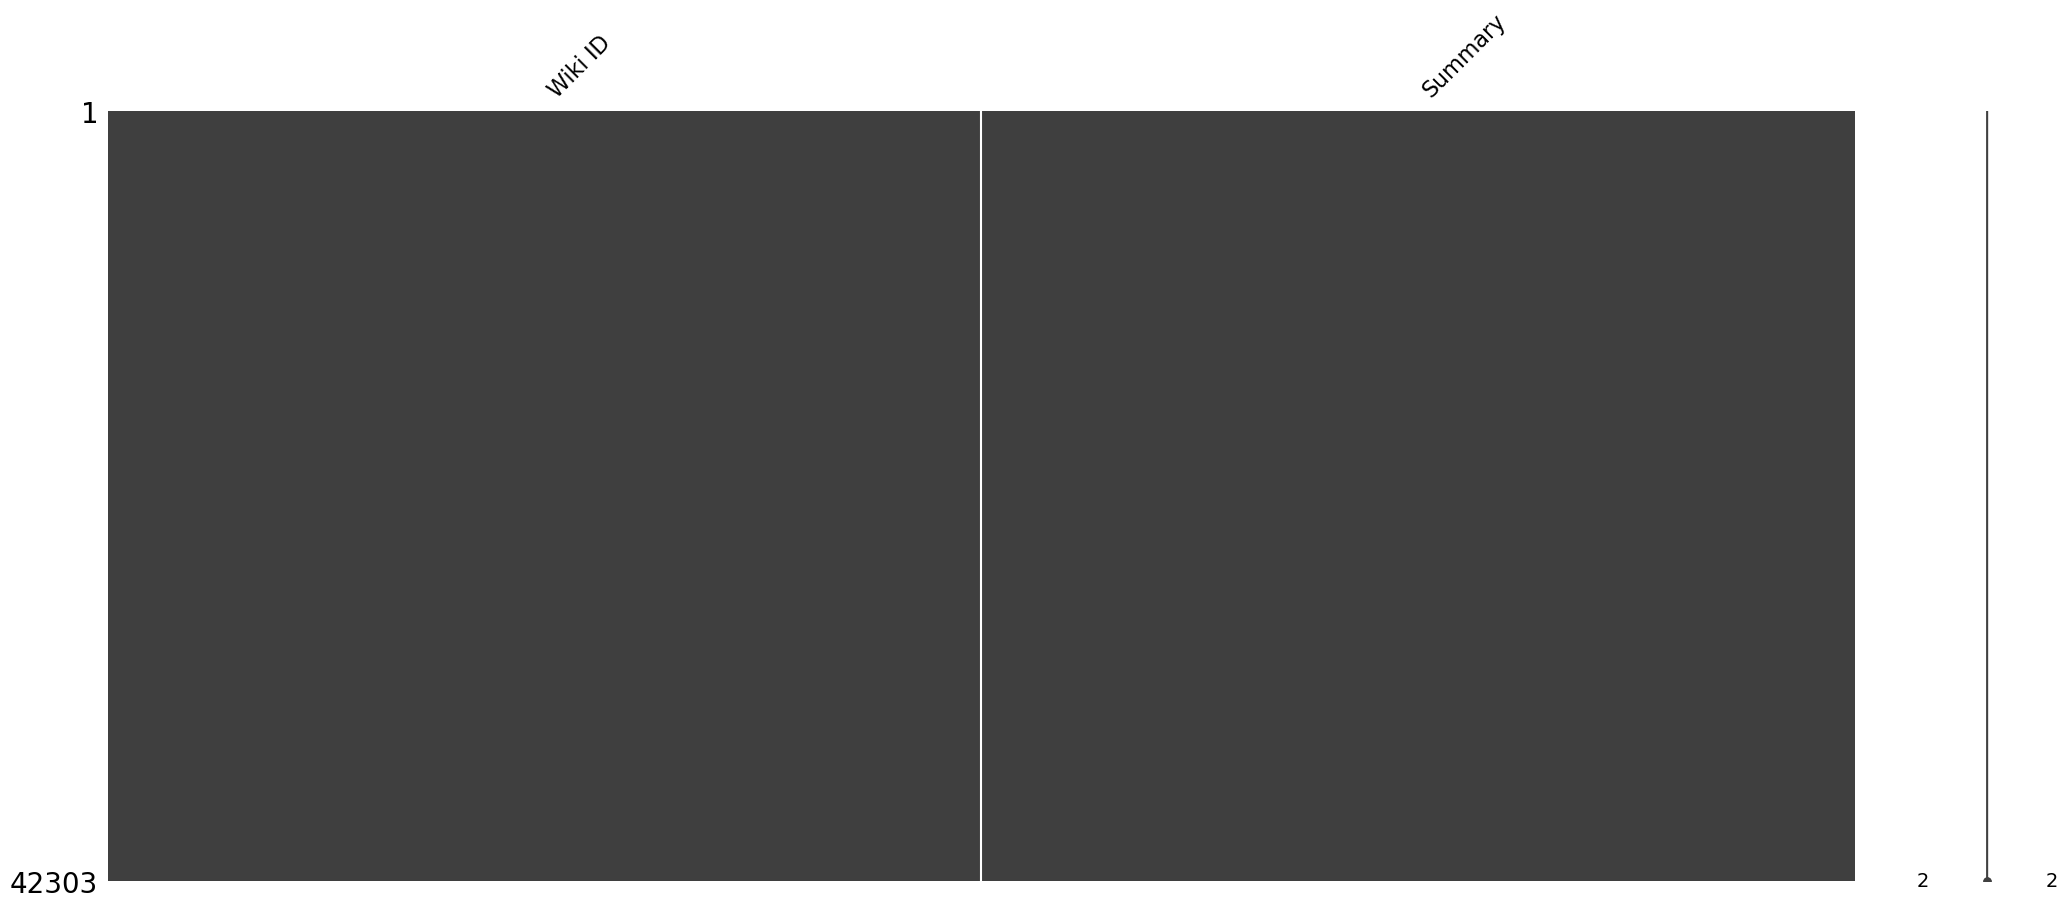

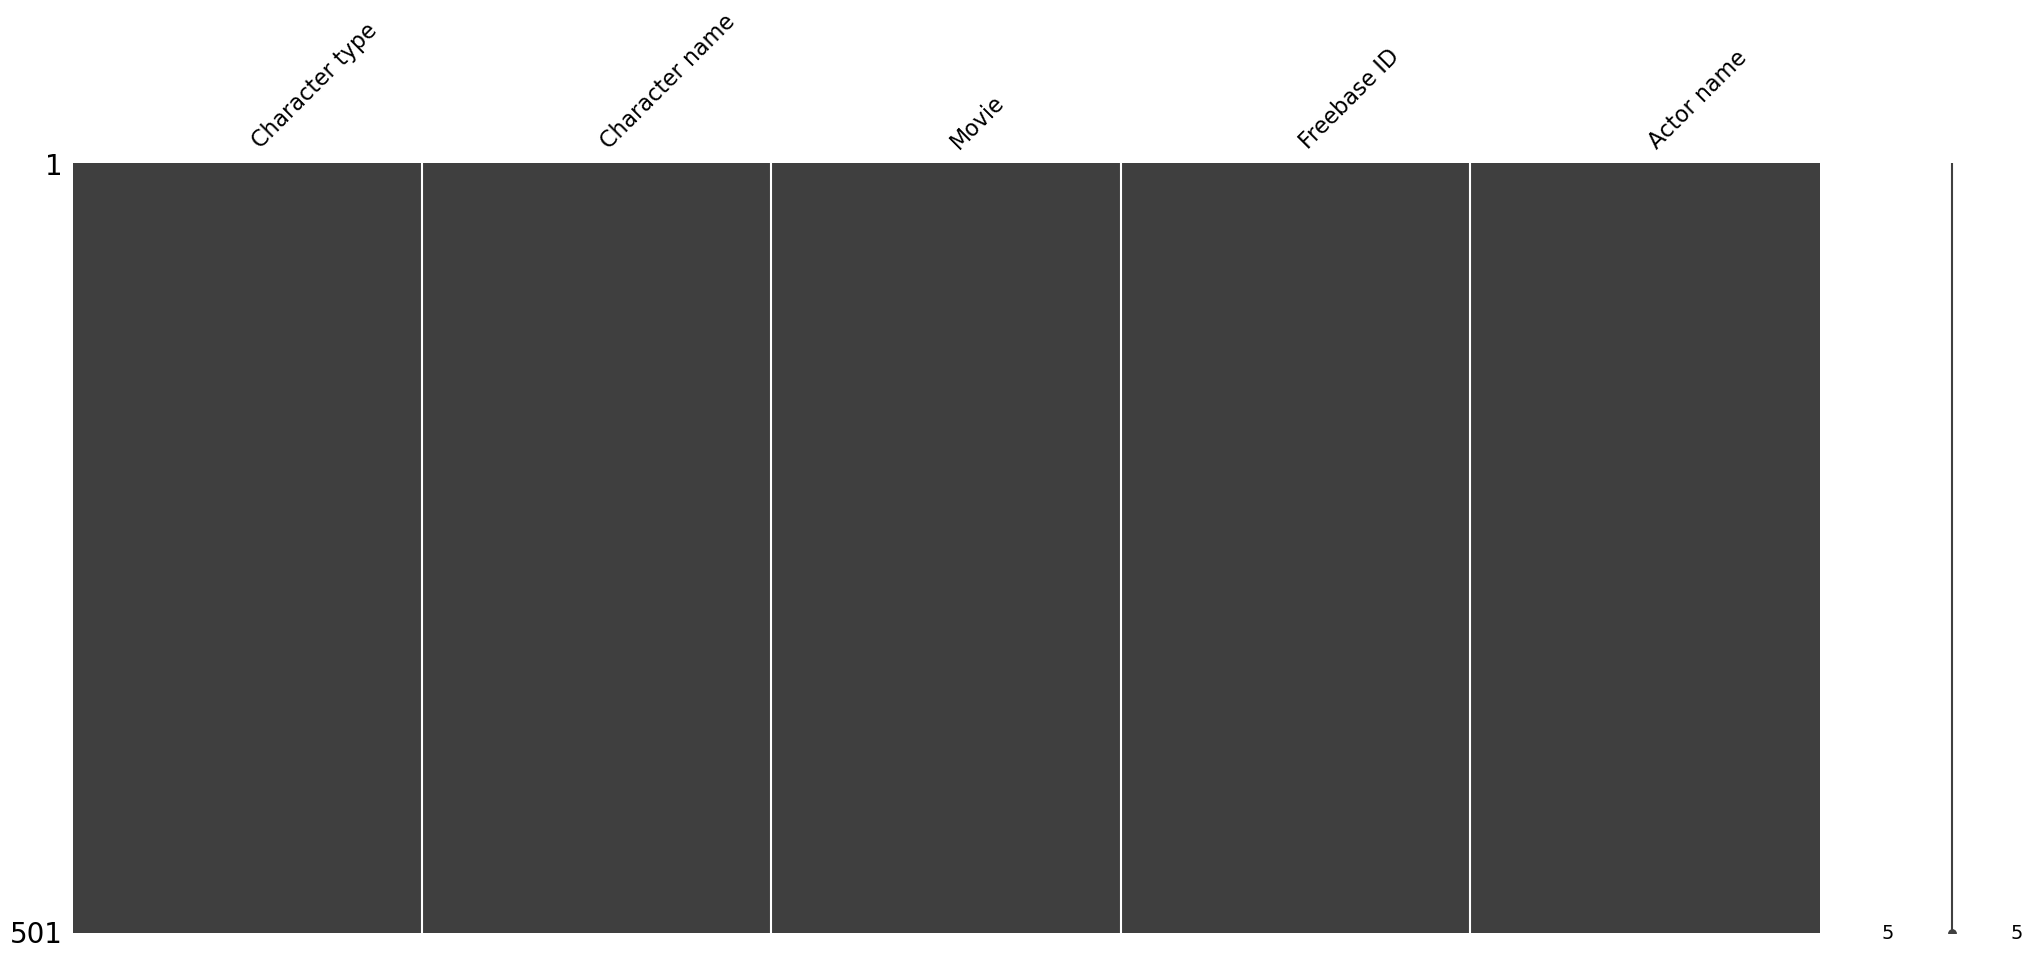

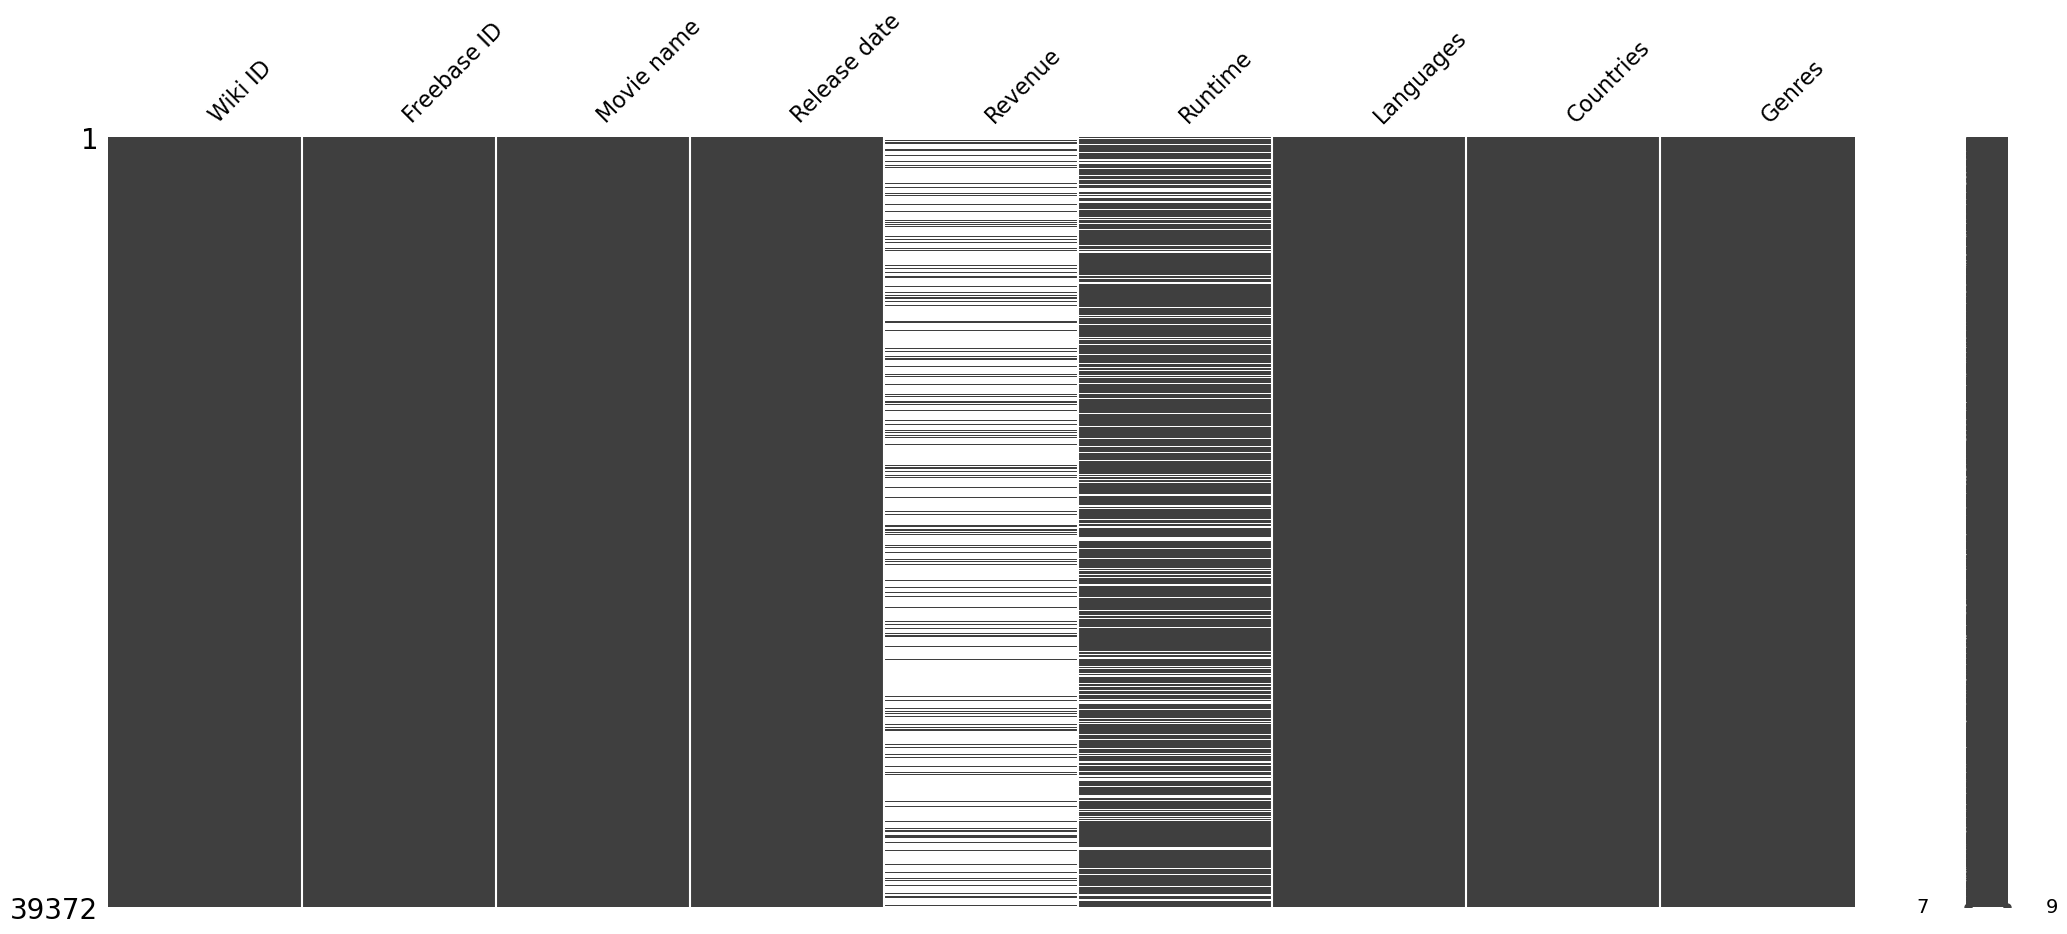

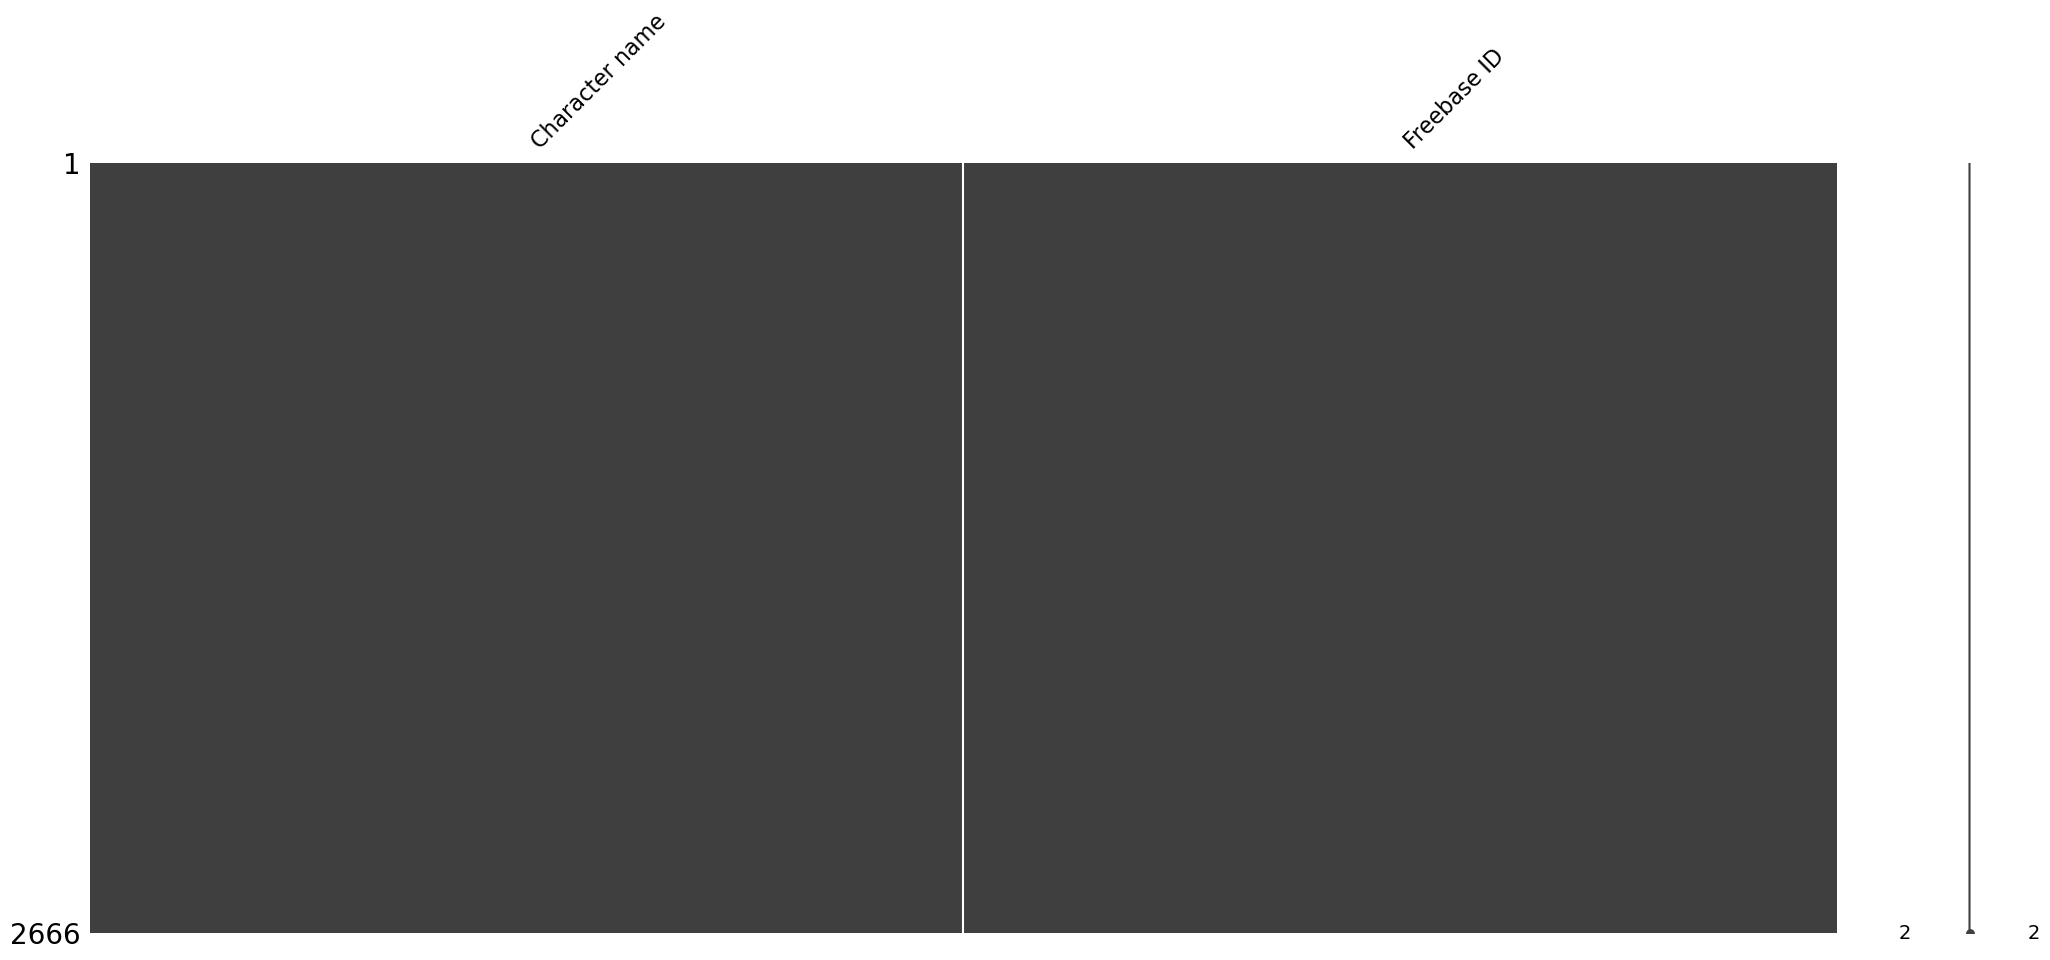

In [19]:
msno.matrix(RAW.character_data)
msno.matrix(RAW.summaries)
msno.matrix(RAW.tvtropes)
msno.matrix(RAW.movie_data)
msno.matrix(RAW.character_names)

In [ ]:
# Tout mettre en subplot ?

Now we will plot the % of missing data

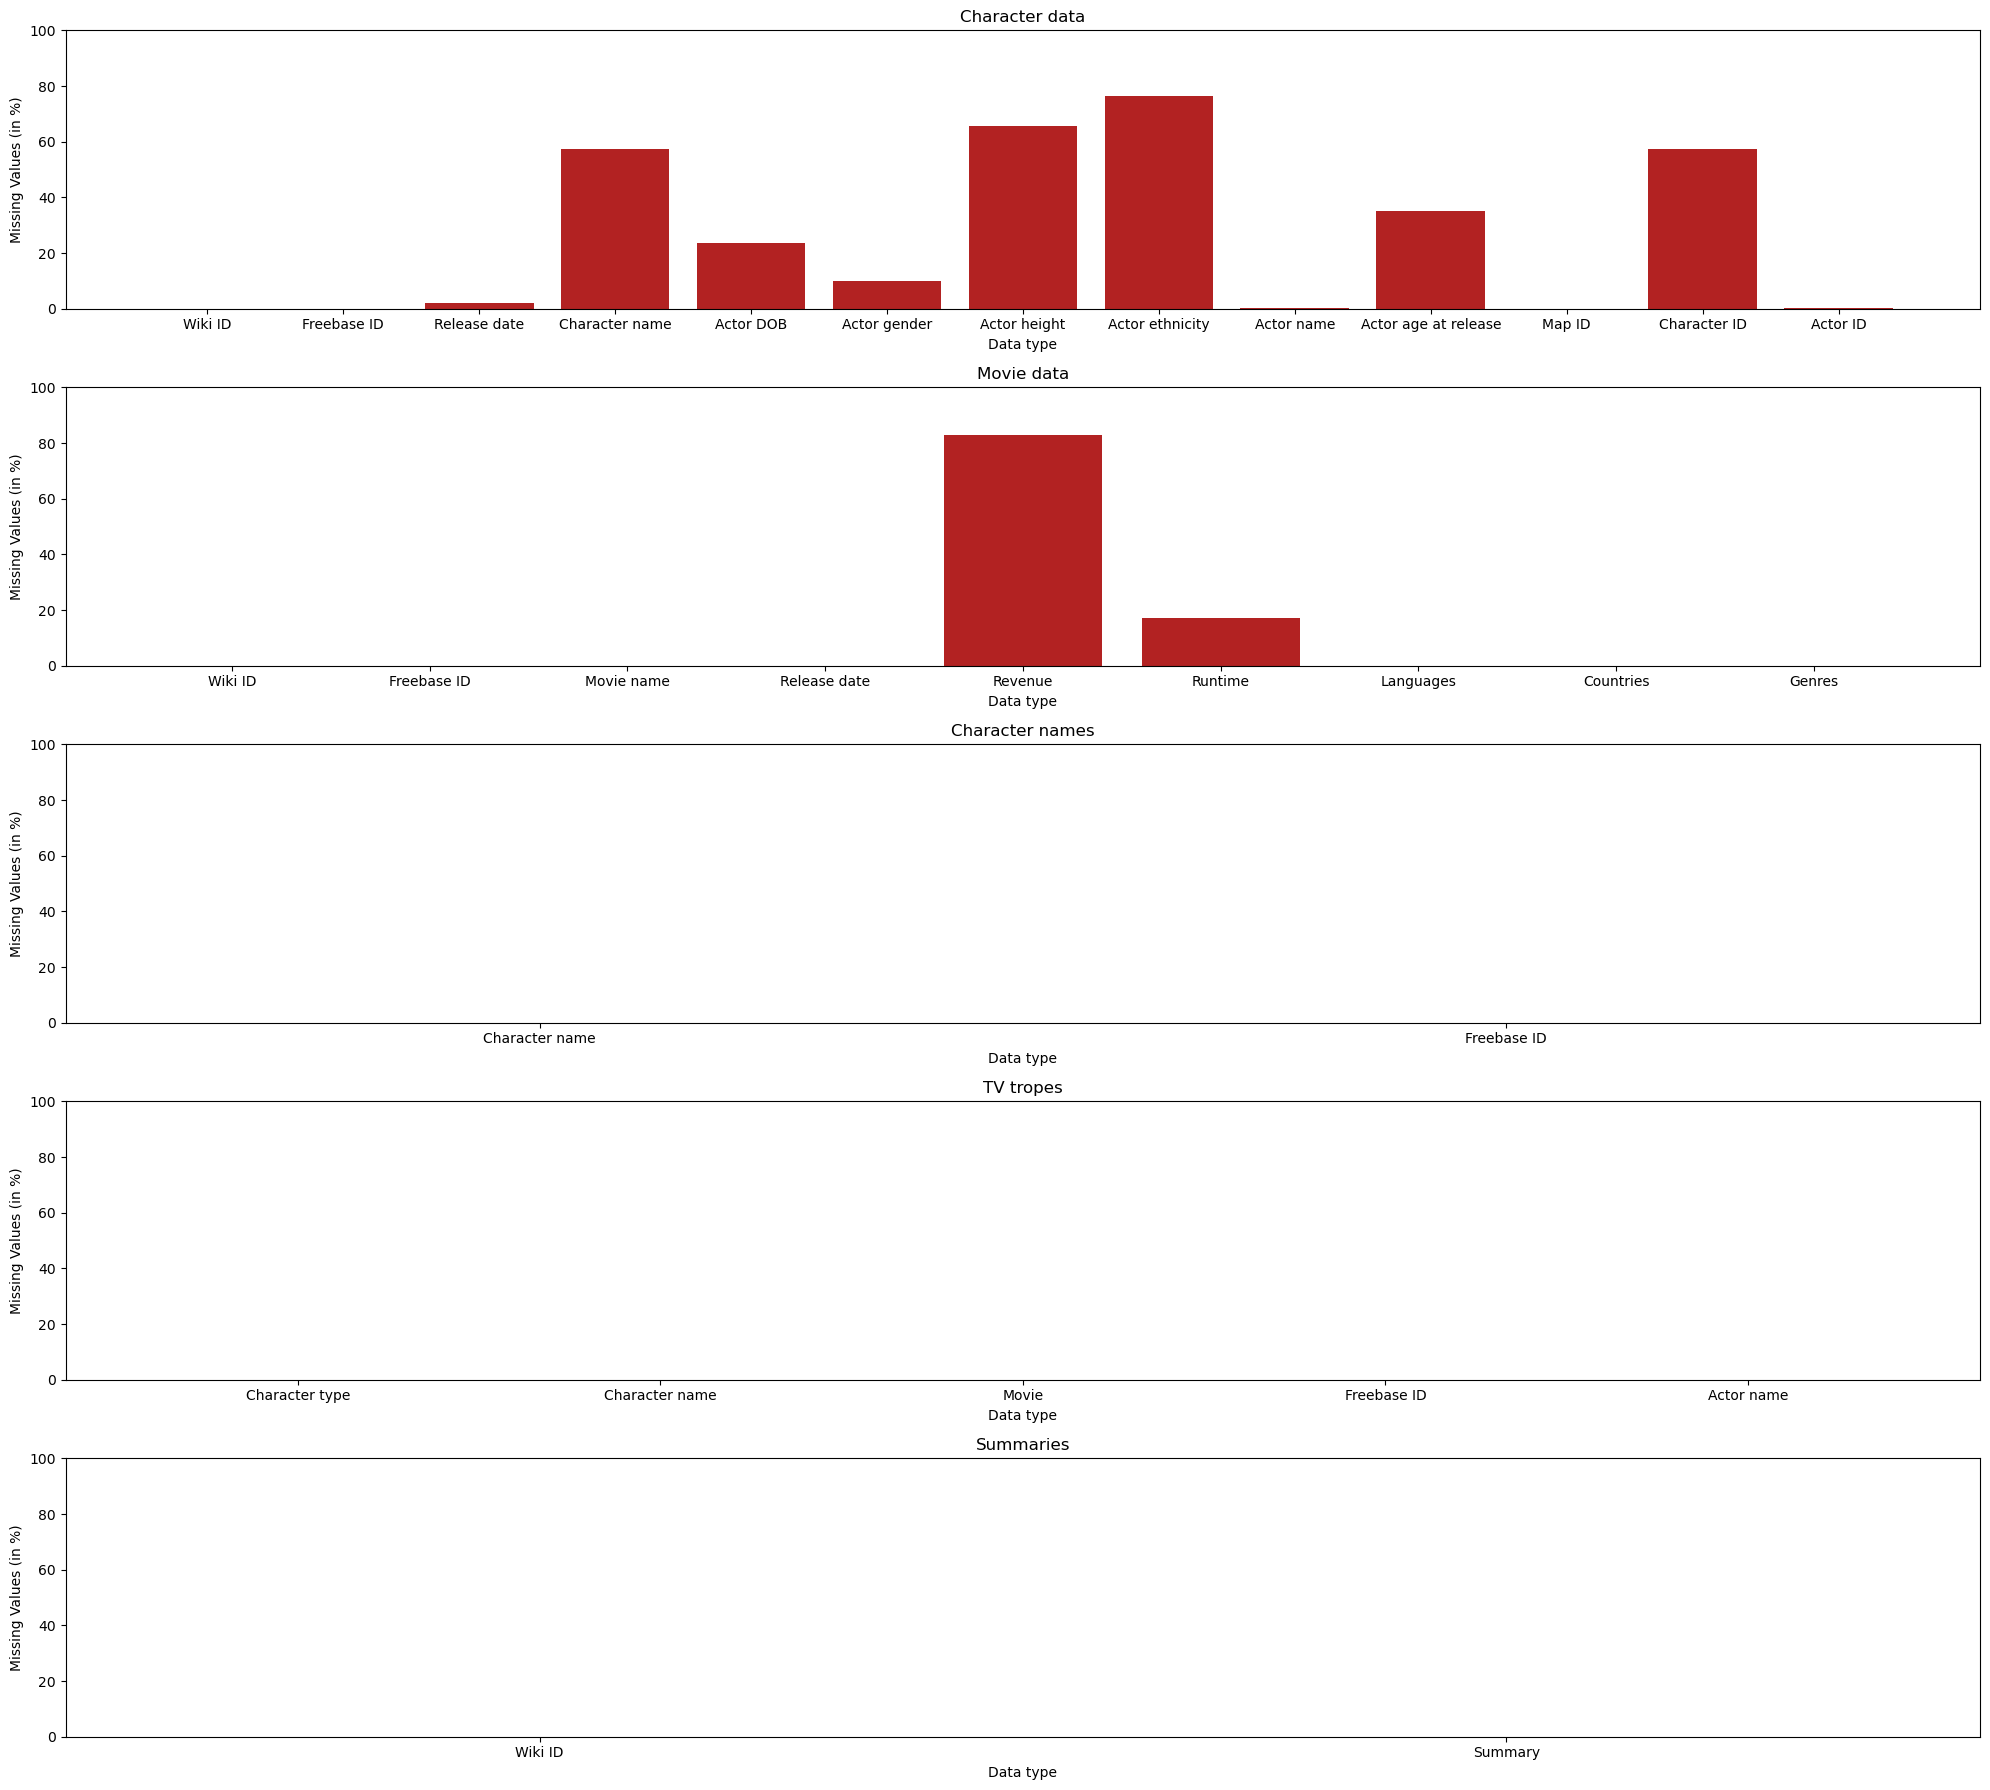

In [60]:
missing_percentage1 = (RAW.character_data.isnull().sum() / len (RAW.character_data)) * 100
missing_percentage2 = (RAW.movie_data.isnull().sum() / len (RAW.movie_data)) * 100
missing_percentage3 = (RAW.character_names.isnull().sum() / len (RAW.character_names)) * 100
missing_percentage4 = (RAW.tvtropes.isnull().sum() / len (RAW.tvtropes)) * 100
missing_percentage5 = (RAW.summaries.isnull().sum() / len (RAW.summaries)) * 100

import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(20, 18))

# Subplot 1
axs[0].bar(missing_percentage1.index, missing_percentage1.values, color='firebrick')
axs[0].set_title('Character data')
axs[0].set_xlabel('Data type')
axs[0].set_ylabel('Missing Values (in %)')
axs[0].set_ylim(0,100)

# Subplot 2
axs[1].bar(missing_percentage2.index, missing_percentage2.values, color='firebrick')
axs[1].set_title('Movie data')
axs[1].set_xlabel('Data type')
axs[1].set_ylabel('Missing Values (in %)')
axs[1].set_ylim(0,100)

# Subplot 3
axs[2].bar(missing_percentage3.index, missing_percentage3.values, color='firebrick')
axs[2].set_title('Character names')
axs[2].set_xlabel('Data type')
axs[2].set_ylabel('Missing Values (in %)')
axs[2].set_ylim(0,100)

# Subplot 4
axs[3].bar(missing_percentage4.index, missing_percentage4.values, color='firebrick')
axs[3].set_title('TV tropes')
axs[3].set_xlabel('Data type')
axs[3].set_ylabel('Missing Values (in %)')
axs[3].set_ylim(0,100)

# Subplot 5
axs[4].bar(missing_percentage5.index, missing_percentage5.values, color='firebrick')
axs[4].set_title('Summaries')
axs[4].set_xlabel('Data type')
axs[4].set_ylabel('Missing Values (in %)')
axs[4].set_ylim(0,100)


plt.ylim(0,100)
plt.tight_layout()
plt.show()


Finir par we will now go deeper in each of the datasets to blabla

 ### Character dataset